# Bulldozer price prediction model
Goal of this project is to predict a price of a bulldozer using machine learning technologies

## 1. Probelm definition
How we can effectivly predict a bulldozer price, when given its characteristics and previous examples of how much bulldozer has been sold for?

## 2. Data
Used data is downloaded from Kaggle Bluebook for Bulldozers competition: 

https://www.kaggle.com/competitions/bluebook-for-bulldozers/



The data for this competition is split into three parts:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

## 4. Features
Given dataset provides a data dictionary, where all features are discribed. You can look them up here: 

https://aghedupl-my.sharepoint.com/:x:/g/personal/jteichman_student_agh_edu_pl/Eca6kfmo9M1DtEWCXeOK42sB9xLZPh_bizC9SGORSUEY6w?e=7Dv78o

## 5.Getting familiar with dataset - exploratory data analisys (EDA)

In [1]:
# Importing needed libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
# Importing train and valid data
df = pd.read_csv('./bluebook-for-bulldozers/TrainAndValid.csv', 
                 low_memory=False, 
                 parse_dates=['saledate'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

#### Missing data

In [4]:
# Checking if there are missing data in dataset
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

#### Distribution of sale prices

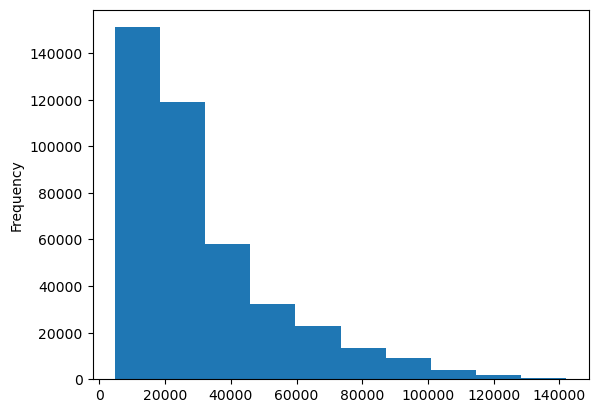

In [5]:
df.SalePrice.plot.hist()
plt.show()

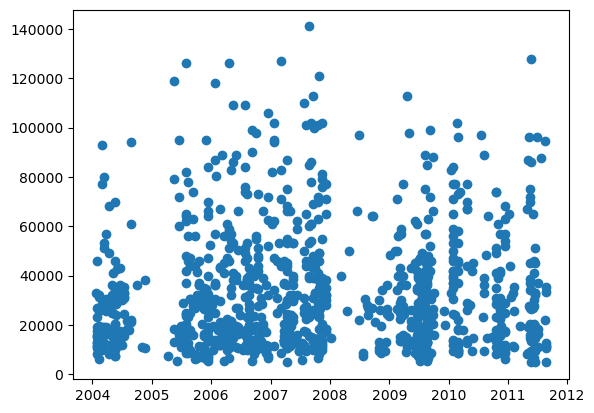

In [6]:
fig, ax = plt.subplots()
ax.scatter(df.saledate[:1000], df.SalePrice[:1000])
plt.show()

In [7]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### Adding date parameters from salesdate column

In [8]:
df_tmp = df.copy()

In [9]:
df_tmp['saleDay'] = df.saledate.dt.day
df_tmp['saleMonth'] = df.saledate.dt.month
df_tmp['saleYear'] = df.saledate.dt.year
df_tmp['saleDayOfWeek'] = df.saledate.dt.dayofweek
df_tmp['saleDayOfYear'] = df.saledate.dt.dayofyear

In [10]:
df_tmp.drop('saledate', axis = 1, inplace= True)

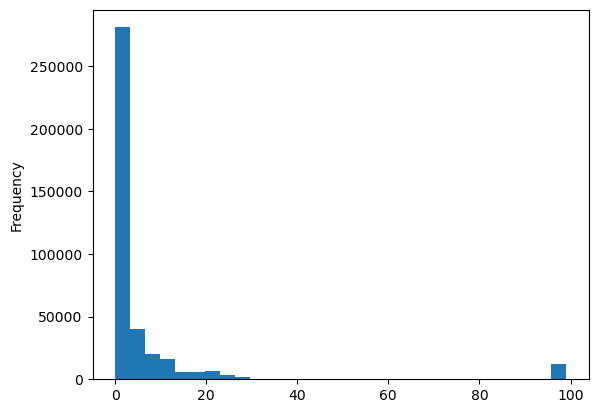

In [11]:
df_tmp.auctioneerID.plot.hist(bins = 30)
plt.show()

In [12]:
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virgi

## 6. Modeling

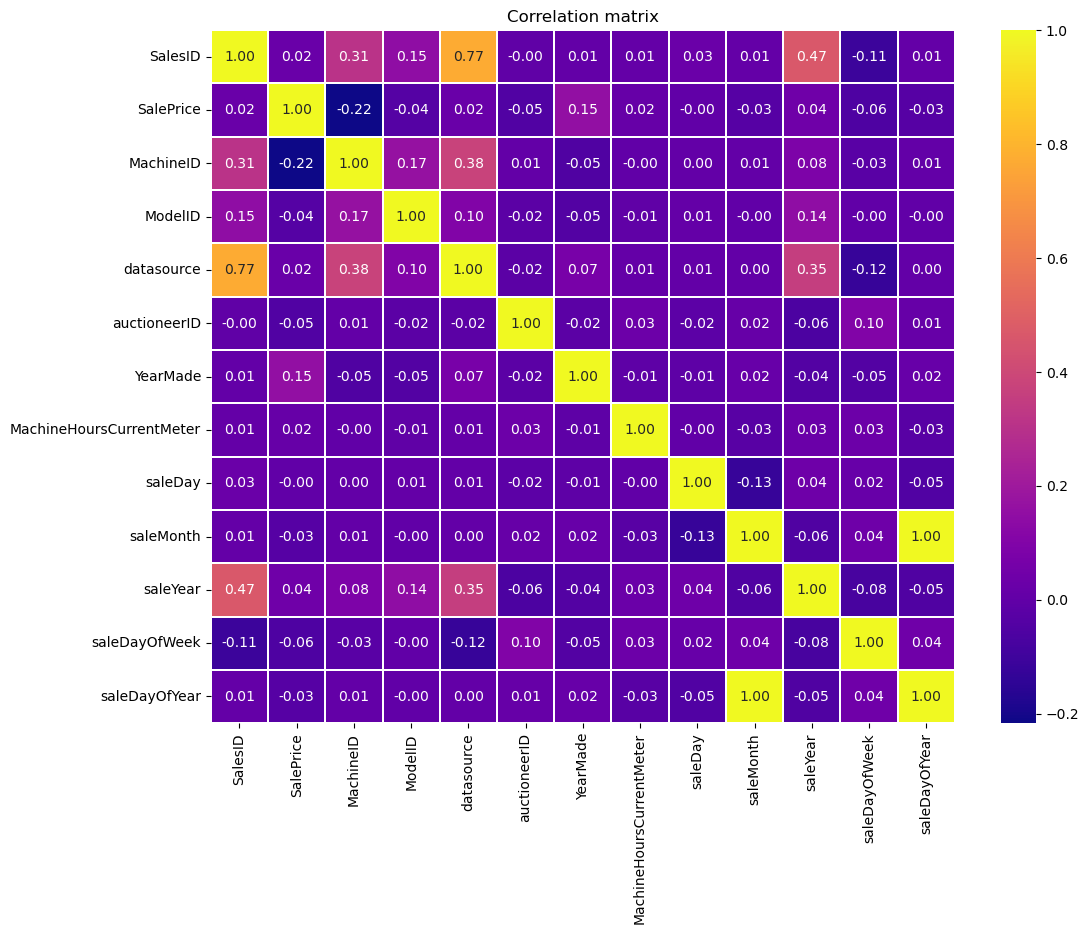

In [14]:
# Visualizing correlation matrix using seaborn 
corr_matrix = df_tmp.corr(numeric_only=True)
fig, ax = plt.subplots(figsize = (12, 9))
ax = sns.heatmap(corr_matrix, 
                 annot= True, 
                 linewidths= 0.3,
                 fmt='.2f',
                 cmap= 'plasma')
ax.set(title = 'Correlation matrix')
plt.show()
